In [6]:
import sys
import os

# ajouter le dossier parent au path
sys.path.append(os.path.abspath(".."))  # .. = dossier parent

from perceptron.Perceptron import Perceptron
import pandas as pd  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl

In [7]:

df = pd.read_csv("..//bcw_data.csv")
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

features = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
X = df[features]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


# min-max scaling sur chaque colonne
min_vals = X_train.min(axis=0)
max_vals = X_train.max(axis=0)

X_train = (X_train - min_vals) / (max_vals - min_vals)
X_test = (X_test - min_vals) / (max_vals - min_vals)


Meilleure epoch : 42, Accuracy : 0.9824561403508771


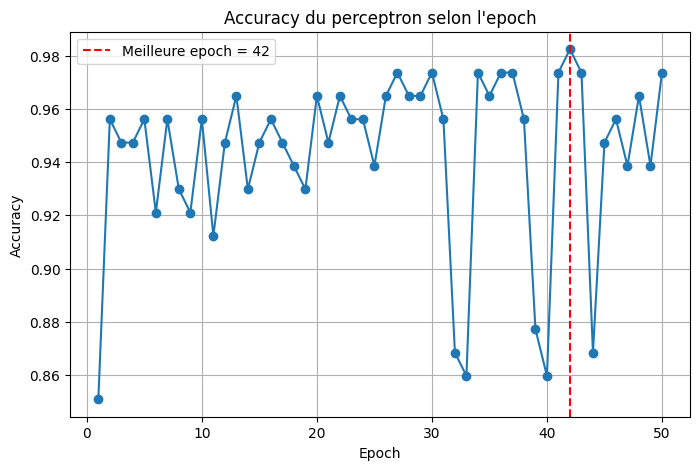

In [8]:
model = Perceptron(n_features=X_train.shape[1])
best_model = Perceptron(n_features=X_train.shape[1])


accuracies = []

for i in range(1, 51):  # commence à 1 epoch
    best_model.train(X_train, y_train, epochs=1)  # on entraîne **1 epoch à la fois**
    y_pred = best_model.predict(X_test)
    acc = sum(yp == yt for yp, yt in zip(y_pred, y_test)) / len(y_test)
    accuracies.append(acc)
best_epoch = accuracies.index(max(accuracies)) + 1  
max_acc = max(accuracies)
print(f"Meilleure epoch : {best_epoch}, Accuracy : {max_acc}")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy du perceptron selon l'epoch")
plt.axvline(best_epoch, color='red', linestyle='--', label=f"Meilleure epoch = {best_epoch}")
plt.legend()
plt.grid(True)
plt.show()


model.train(X_train, y_train, epochs=best_epoch)

with open('../src/perceptron.pkl' , 'wb') as file :
    pkl.dump(model,file)



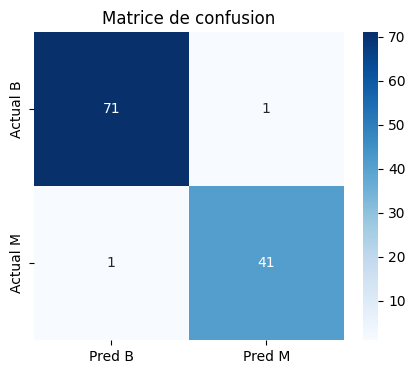

Accuracy : 0.982
TP : 41, TN : 71, FP : 1, FN : 1
Precision : 0.976
Recall : 0.976
F1-score : 0.976


In [35]:

# test
y_pred = model.predict(X_test)  # ici on passe tout le dataset


tp = tn = fp = fn = 0

for yp, yt in zip(y_pred, y_test):
    if yt == 1 and yp == 1: tp += 1
    elif yt == 0 and yp == 0: tn += 1
    elif yt == 0 and yp == 1: fp += 1
    elif yt == 1 and yp == 0: fn += 1

accuracy = (tp + tn) / len(y_test)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

conf_matrix = np.array([[tn, fp],
                        [fn, tp]])

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred B", "Pred M"], yticklabels=["Actual B", "Actual M"])
plt.title("Matrice de confusion")
plt.show()

print(f"Accuracy : {accuracy:.3f}")
print(f"TP : {tp}, TN : {tn}, FP : {fp}, FN : {fn}")
print(f"Precision : {precision:.3f}")
print(f"Recall : {recall:.3f}")
print(f"F1-score : {f1:.3f}")


